In [49]:
import pynbody
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Necesito calcular la densidad de pares teoricos para calcular la funcion de correlacion. Para ver la correlacion con las estrellas o el gas necesito primero saber cuantas estrellas se me forman, para esto voy a necesitar el box homogeneo. Pero en el caso de la correlacion estrella-materia oscura voy a necesitar ver en un box a una dada masa por particulas, cuantas particulas tengo. 
Yo estaba trabajando con un box de 200 Mpc (correlacion.f90), y mi masa por particula de dm es masa_dm=0.09328805

In [50]:
path='/mnt/is0/fstasys/512_b/512_mass/out/'
s=pynbody.load(path+'snapshot_047')

In [51]:
s.properties

{'omegaM0': 0.276,
 'omegaL0': 0.724,
 'boxsize': Unit("1.25e+02 Mpc a h**-1"),
 'a': 0.8354841246321474,
 'h': 0.703,
 'time': Unit("8.91e-03 s Mpc a**1/2 h**-1 km**-1")}

In [52]:
np.max(s.star['mass'])

SimArray(0.018173, dtype=float32, '1.00e+10 Msol h**-1')

In [53]:
len(s.star['mass'])

10439184

Voy a calcular la fraccion del universo que es estrella

In [54]:
bf=len(s.star['mass'])/len(s.gas['mass'])
print('baryon fraction:',bf)

baryon fraction: 0.08433758923517472


In [55]:
masa_gs = 0.0181731e10
lbox    = 125
vol=lbox**3

trazers_u=250666
trazers_s=4891
trazers_r=16936
dpares_st_r=trazers_r*len(s.star['mass'])/vol
dpares_gs_r=trazers_r*len(s.gas['mass'])/vol
dpares_dm_r=trazers_r*len(s.dm['mass'])/vol
dpares_st_s=trazers_s*len(s.star['mass'])/vol
dpares_gs_s=trazers_s*len(s.gas['mass'])/vol
dpares_dm_s=trazers_s*len(s.dm['mass'])/vol
dpares_st_u=trazers_u*len(s.star['mass'])/vol
dpares_gs_u=trazers_u*len(s.gas['mass'])/vol
dpares_dm_u=trazers_u*len(s.dm['mass'])/vol

In [64]:
200**3

8000000

In [56]:
s=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_S.dat')
r=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_R.dat')
u=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/correlacion_out.dat')

In [57]:
pares_teoricos_st_r=[]
pares_teoricos_gs_r=[]
pares_teoricos_dm_r=[]
pares_teoricos_st_s=[]
pares_teoricos_gs_s=[]
pares_teoricos_dm_s=[]
pares_teoricos_st_u=[]
pares_teoricos_gs_u=[]
pares_teoricos_dm_u=[]
rs=0.001; rr=0.001;ru=0.001

for i in range(len(t)):
    vs=(4./3.)*np.pi*(s[i,0]**3-rs**3)
    vr=(4./3.)*np.pi*(r[i,0]**3-rr**3)
    vu=(4./3.)*np.pi*(u[i,0]**3-ru**3)

    pares_teoricos_st_r.append(dpares_st_r*vr)
    pares_teoricos_gs_r.append(dpares_gs_r*vr)
    pares_teoricos_dm_r.append(dpares_dm_r*vr)
    pares_teoricos_st_s.append(dpares_st_s*vs)
    pares_teoricos_gs_s.append(dpares_gs_s*vs)
    pares_teoricos_dm_s.append(dpares_dm_s*vs)
    pares_teoricos_st_u.append(dpares_st_u*vr)
    pares_teoricos_gs_u.append(dpares_gs_u*vr)
    pares_teoricos_dm_u.append(dpares_dm_u*vr)
    rs=s[i,0]
    rr=r[i,0]
    ru=u[i,0]
     


pares_teoricos_st_r=np.array(pares_teoricos_st_r)
pares_teoricos_gs_r=np.array(pares_teoricos_gs_r)
pares_teoricos_dm_r=np.array(pares_teoricos_dm_r)
pares_teoricos_st_s=np.array(pares_teoricos_st_s)
pares_teoricos_gs_s=np.array(pares_teoricos_gs_s)
pares_teoricos_dm_s=np.array(pares_teoricos_dm_s)
pares_teoricos_st_u=np.array(pares_teoricos_st_u)
pares_teoricos_gs_u=np.array(pares_teoricos_gs_u)
pares_teoricos_dm_u=np.array(pares_teoricos_dm_u)

In [58]:
xi_st_r=(r[:,1])/(pares_teoricos_st_r)-1.
xi_gs_r=(r[:,2])/(pares_teoricos_gs_r)-1.
xi_dm_r=(r[:,3])/(pares_teoricos_dm_r)-1.

xi_st_s=(s[:,1])/(pares_teoricos_st_s)-1.
xi_gs_s=(s[:,2])/(pares_teoricos_gs_s)-1.
xi_dm_s=(s[:,3])/(pares_teoricos_dm_s)-1.

xi_st_u=(u[:,1])/(pares_teoricos_st_u)-1.
xi_gs_u=(u[:,2])/(pares_teoricos_gs_u)-1.
xi_dm_u=(u[:,3])/(pares_teoricos_dm_u)-1.

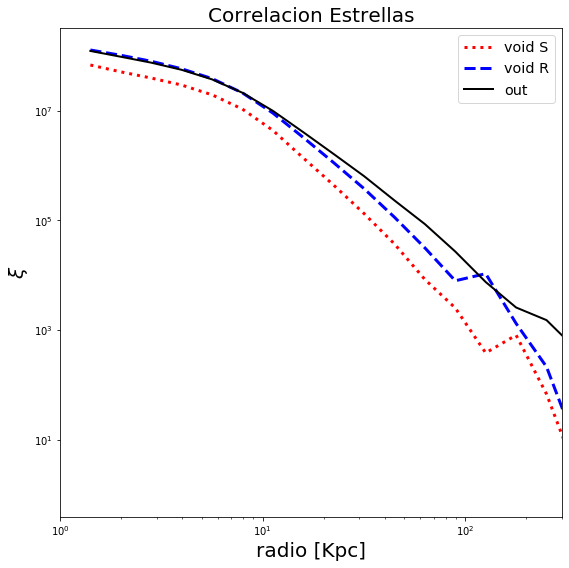

In [84]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Estrellas',size=20)
plt.plot(s[:,0]*1e3,xi_st_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_st_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_st_u,label='out',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.xlim(1,300)
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_stars.pdf',format='pdf')

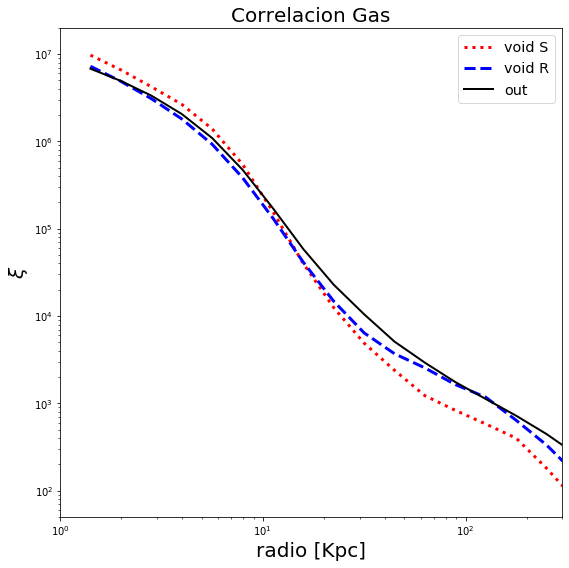

In [83]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Gas',size=20)
plt.plot(s[:,0]*1e3,xi_gs_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_gs_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_gs_u,label='out',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.xlim(1,300)
plt.ylim(50,2e7)
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_gas.pdf',format='pdf')

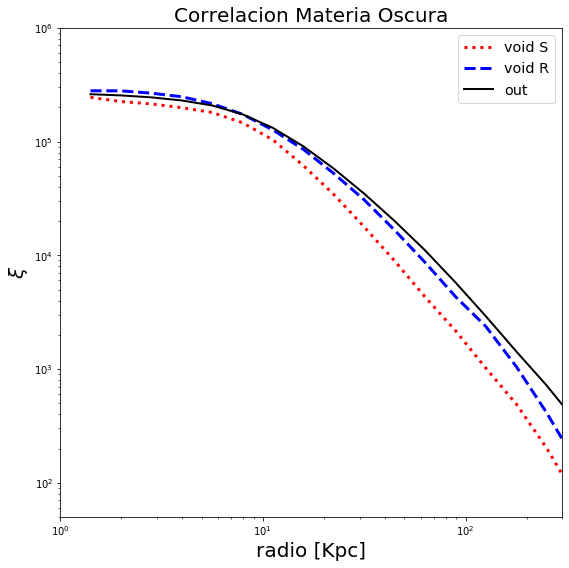

In [82]:
plt.figure(figsize=(9,9))
plt.title('Correlacion Materia Oscura',size=20)
plt.plot(s[:,0]*1e3,xi_dm_s,label='void S',ls='dotted',lw=3,color='red')
plt.plot(r[:,0]*1e3,xi_dm_r,label='void R',ls='--',lw=3,color='blue')
plt.plot(u[:,0]*1e3,xi_dm_u,label='out',color='black',lw=2)
plt.legend(fontsize='x-large')
plt.ylabel('$ \\xi $',size=20)
plt.xlabel('radio [Kpc]',size=20)
plt.semilogx()
plt.semilogy()

plt.xlim(1,300)
plt.ylim(50,1e6)
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/Correlacion_dm.pdf',format='pdf')